## Comparison with 10 consecutive runs

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
from astropy.table import Table

In [2]:
path = '../Data/'
dataPath = 'sextans/'

mt = Table.read(path+'utils/master_table_edr3_final.txt',format='ascii')
it = np.where((mt['name']=='Sextans'))
mt = mt[it]

RA_gal = mt['ra'].data[0]
DEC_gal = mt['dec'].data[0]


output0 = Table.read(path+dataPath+'/out_test_Sextans_eDR3_Battaglia.fits', format='fits')
columns_legend = output0.colnames       #It's a list

data_tensor = []
iter_index = ['1','2','3','4','5','6','7','8','9','10']
for i in range(10):
    temp = Table.read(path+dataPath+'out_cat/iteractive/out_test_Sextans_eDR3_'+iter_index[i]+'.fits')
    temp = temp.to_pandas().to_numpy()
    data_tensor.append(temp)
data_tensor = np.array(data_tensor)
print(data_tensor.shape)


(10, 32429, 43)


## iterations comparison
Let's now print the 10 distribution probabilities

/tmp/ipykernel_66508/2403208231.py:1: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  color_map = plt.cm.get_cmap('viridis', 10)
/home/marcoboscato/miniconda3/envs/Tesi/lib/python3.10/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/marcoboscato/miniconda3/envs/Tesi/lib/python3.10/site-packages/numpy/lib/histograms.py:826: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


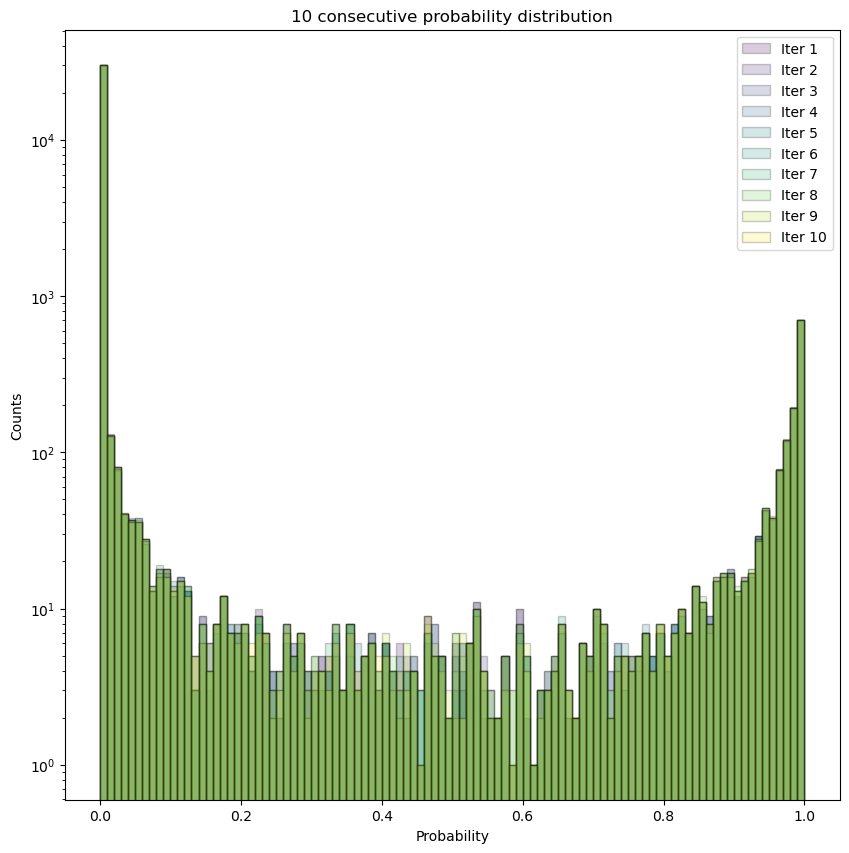

In [3]:
color_map = plt.cm.get_cmap('viridis', 10)

fig, ax = plt.subplots(1,1,figsize=(10,10))

for i in range(10):
    ax.hist(data_tensor[i,:,columns_legend.index('P')], bins=100, alpha=0.2, color=color_map(i), edgecolor='black', label='Iter '+str(i+1))

ax.set_yscale('log')
ax.set_xlabel('Probability')
ax.set_ylabel('Counts')
ax.set_title('10 consecutive probability distribution')
ax.legend()

fig.savefig(path+dataPath+'Comparison_plots/10_overlaped_probability_distribution.png', bbox_inches='tight', dpi=250)

now let's compare the minimum and the maximum of each star's membership probability

/home/marcoboscato/miniconda3/envs/Tesi/lib/python3.10/site-packages/numpy/core/fromnumeric.py:88: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


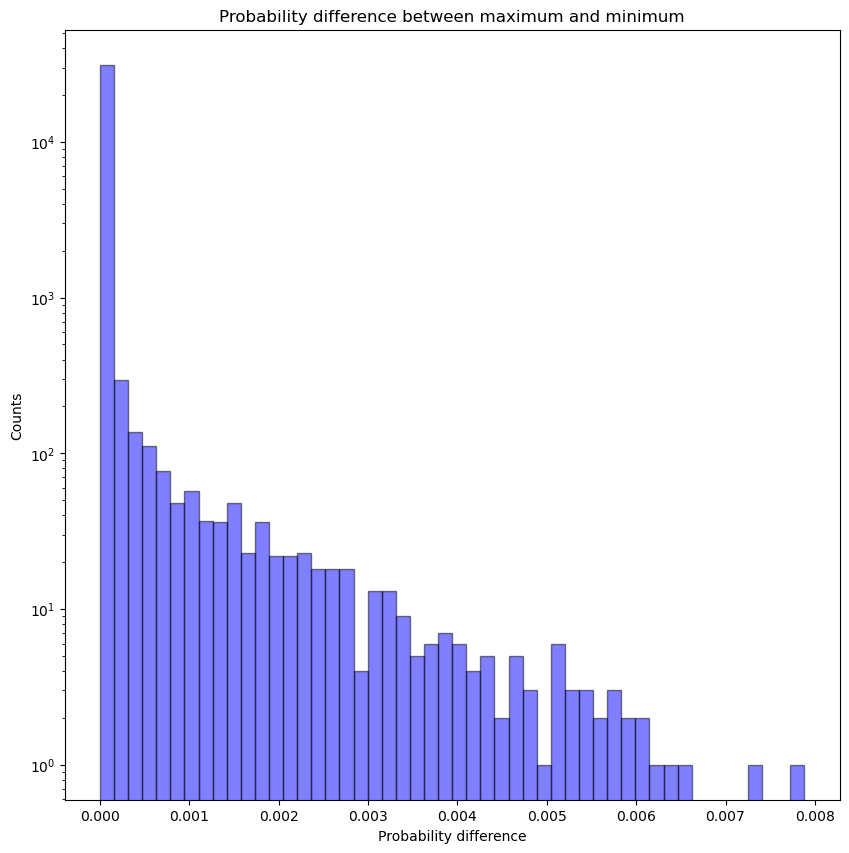

In [4]:
# finding the minimum and maximun probability

min_prob = np.min(data_tensor[:,:,columns_legend.index('P')].T, axis=1)
max_prob = np.max(data_tensor[:,:,columns_legend.index('P')].T, axis=1)

diff = max_prob - min_prob

fig, ax = plt.subplots(1,1,figsize=(10,10))
ax.hist(diff, bins=50, alpha=0.5, color='blue', edgecolor='black')
ax.set_yscale('log')
ax.set_xlabel('Probability difference')
ax.set_ylabel('Counts')
ax.set_title('Probability difference between maximum and minimum')

fig.savefig(path+dataPath+'Comparison_plots/Probability_difference.png', bbox_inches='tight', dpi=250)